In [47]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [49]:
import warnings

# 경고 무시
warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [51]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [52]:
train = train.drop(['user_id'], axis=1)

In [53]:
train['target'] = train['target'].astype('category')

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  object  
 10  subscription_type                  10000 non-null  object  
 11  customer_inquiry_history           10000 n

In [55]:
train.head()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [56]:
# preferred_difficulty_level 열 인코딩
train.loc[train['preferred_difficulty_level'].values == 'Low','preferred_difficulty_level'] = 0
train.loc[train['preferred_difficulty_level'].values == 'Medium','preferred_difficulty_level'] = 1
train.loc[train['preferred_difficulty_level'].values == 'High','preferred_difficulty_level'] = 2
train['preferred_difficulty_level'] = train['preferred_difficulty_level'].astype(int)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  int32   
 10  subscription_type                  10000 non-null  object  
 11  customer_inquiry_history           10000 n

In [58]:
train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,Basic,2,0,1


In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 스케일링을 위한 StandardScaler 인스턴스 생성
scaler = StandardScaler()
categoric_col =['subscription_type']
label_encoders = {}
for col in categoric_col:
    label_encoders[col] = LabelEncoder()
    train[col] = label_encoders[col].fit_transform(train[col])

In [60]:
train

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,0,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,0,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,1,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,0,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,1,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,0,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,0,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,0,2,0,1


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  int32   
 10  subscription_type                  10000 non-null  int32   
 11  customer_inquiry_history           10000 n

In [62]:
train['payment_pattern'] = train['payment_pattern'].astype('category')

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  int32   
 10  subscription_type                  10000 non-null  int32   
 11  customer_inquiry_history           10000 n

In [63]:
X = train[train.columns.drop('target')]
Y = train['target']

In [64]:
# X와 Y로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드 및 전처리
# 예: X는 특징 변수, y는 범주형 목표 변수

# RandomForest 모델 생성 및 학습
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
# 예측
y_pred_rf = model_rf.predict(X_test)

In [67]:
# 정확도 평가
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Accuracy: {accuracy_rf}")

RandomForest Accuracy: 0.5905


In [68]:
#랜덤포레스트 평가 및 테스트
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_rf, average='macro'))

0.4461648947662583


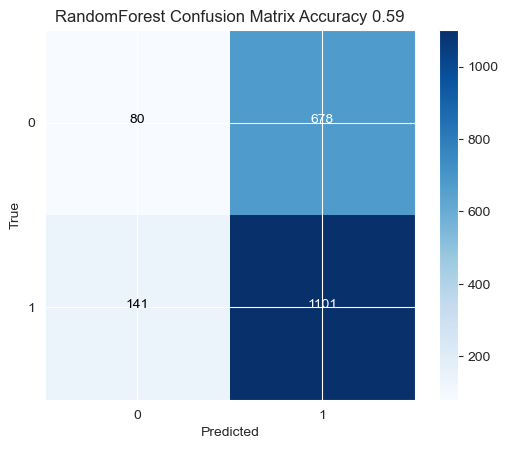

In [69]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred_rf)

# 시각화
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('RandomForest Confusion Matrix Accuracy {}'.format(round((accuracy_rf),2)))
plt.colorbar()

classes = model_rf.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [75]:
import xgboost as xgb

# 데이터셋 로드 및 전처리
# 예: X는 특징 변수, y는 범주형 목표 변수


# XGBoost 모델 생성 및 학습
model_xgb = xgb.XGBClassifier(random_state=2200,objective="multi:softmax", num_class=2, n_estimators=100, device="cuda")
model_xgb.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:payment_pattern: object

In [43]:
y_pred_xgb = model_xgb.predict(X_test)

In [44]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.582


In [45]:
print(f1_score(y_test,y_pred_xgb , average='macro'))

0.5136


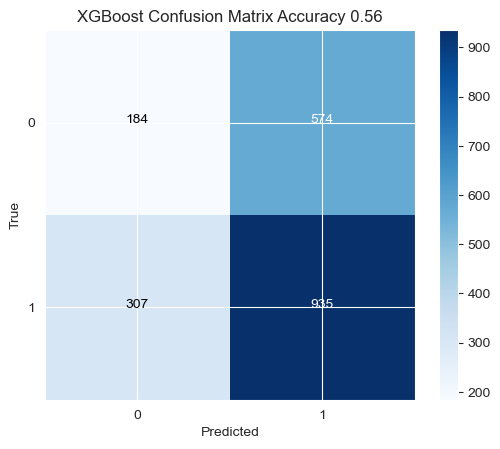

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred_xgb)

# 시각화
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix Accuracy {}'.format(round((accuracy_xgb),2)))
plt.colorbar()

classes = model_xgb.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [30]:
from catboost import CatBoostClassifier


# CatBoost 모델 생성 및 학습
model_catboost = CatBoostClassifier(iterations=150, depth=10, learning_rate=0.01, loss_function='MultiClass', cat_features=[0, 1])
model_catboost.fit(X_train, y_train)

0:	learn: 0.6923698	total: 214ms	remaining: 31.9s
1:	learn: 0.6916542	total: 280ms	remaining: 20.7s
2:	learn: 0.6909263	total: 366ms	remaining: 17.9s
3:	learn: 0.6901758	total: 456ms	remaining: 16.6s
4:	learn: 0.6894320	total: 516ms	remaining: 15s
5:	learn: 0.6886955	total: 579ms	remaining: 13.9s
6:	learn: 0.6879976	total: 641ms	remaining: 13.1s
7:	learn: 0.6872661	total: 702ms	remaining: 12.5s
8:	learn: 0.6865689	total: 765ms	remaining: 12s
9:	learn: 0.6858226	total: 825ms	remaining: 11.5s
10:	learn: 0.6851088	total: 885ms	remaining: 11.2s
11:	learn: 0.6844222	total: 946ms	remaining: 10.9s
12:	learn: 0.6837234	total: 1.01s	remaining: 10.6s
13:	learn: 0.6830895	total: 1.07s	remaining: 10.4s
14:	learn: 0.6824309	total: 1.13s	remaining: 10.1s
15:	learn: 0.6818285	total: 1.19s	remaining: 9.96s
16:	learn: 0.6811968	total: 1.25s	remaining: 9.79s
17:	learn: 0.6806036	total: 1.27s	remaining: 9.34s
18:	learn: 0.6799255	total: 1.33s	remaining: 9.2s
19:	learn: 0.6793347	total: 1.35s	remaining: 8

In [31]:
# 예측
y_pred_catboost = model_catboost.predict(X_test)

In [32]:
# 정확도 평가
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")

CatBoost Accuracy: 0.621


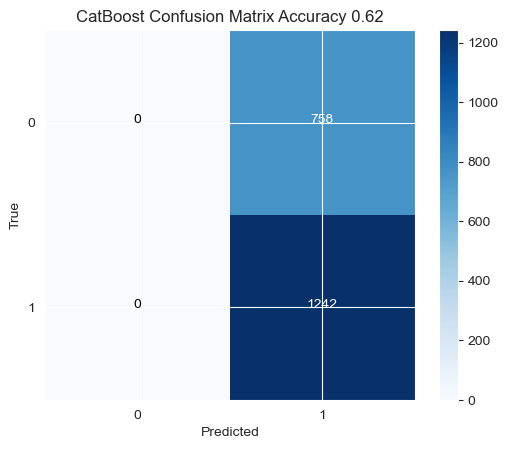

In [201]:
# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred_catboost)

# 시각화
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('CatBoost Confusion Matrix Accuracy {}'.format(round((accuracy_catboost),2)))
plt.colorbar()

classes = model_catboost.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   subscription_duration              10000 non-null  int64   
 1   recent_login_time                  10000 non-null  int64   
 2   average_login_time                 10000 non-null  float64 
 3   average_time_per_learning_session  10000 non-null  float64 
 4   monthly_active_learning_days       10000 non-null  int64   
 5   total_completed_courses            10000 non-null  int64   
 6   recent_learning_achievement        10000 non-null  float64 
 7   abandoned_learning_sessions        10000 non-null  int64   
 8   community_engagement_level         10000 non-null  int64   
 9   preferred_difficulty_level         10000 non-null  int32   
 10  subscription_type                  10000 non-null  int32   
 11  customer_inquiry_history           10000 n